In [1]:
#importing all required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #use to visualize dataset vallues
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential, load_model, Model
import pickle
from keras.layers import Dense, Dropout, Activation, Flatten
import os
from keras.layers import BatchNormalization, LeakyReLU, Input
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.layers import  MaxPooling2D
from keras.layers import Convolution2D
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
c:\users\techl\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\techl\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\techl\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
#code to load CICAPT-IIoT dataset values
dataset = pd.read_csv("Dataset/phase2_NetworkData.csv")
dataset

,ts,flow_duration,Header_Length,Source IP,Destination IP,Source Port,Destination Port,Protocol Type,Protocol_name,Duration,...,Weight,DS status,Fragments,Sequence number,Protocol Version,flow_idle_time,flow_active_time,label,subLabel,subLabelCat
0,1.701582e+09,30.390806,7160,172.16.63.128,172.16.65.128,41596,8888,6,TCP,64,...,196,0,0,0,0,30.284960,30.390806,1,discovery,permission groups discovery
1,1.701582e+09,30.392918,7226,172.16.63.128,172.16.65.128,41596,8888,6,TCP,64,...,225,0,0,0,0,0.002112,30.392918,1,discovery,permission groups discovery
2,1.701582e+09,30.393575,7292,172.16.65.128,172.16.63.128,8888,41596,6,TCP,64,...,256,0,0,0,0,0.000657,30.393575,1,discovery,permission groups discovery
3,1.701582e+09,30.395687,7358,172.16.65.128,172.16.63.128,8888,41596,6,TCP,64,...,289,0,0,0,0,0.002112,30.395687,1,discovery,permission groups discovery
4,1.701582e+09,61.110169,7424,172.16.63.128,172.16.65.128,41596,8888,6,TCP,64,...,196,0,0,0,0,30.714482,61.110169,1,discovery,permission groups discovery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,1.701728e+09,1.830635,925682,172.16.67.128,93.93.128.193,48884,80,6,TCP,64,...,64,0,0,0,0,0.000514,1.830635,0,0,0
1514,1.701728e+09,1.832257,925736,172.16.67.128,93.93.128.193,48884,80,6,TCP,64,...,81,0,0,0,0,0.001622,1.832257,0,0,0
1515,1.701728e+09,1.834732,927250,93.93.128.193,172.16.67.128,80,48884,6,TCP,127,...,100,0,0,0,0,0.002475,1.834732,0,0,0
1516,1.701728e+09,1.836713,928752,93.93.128.193,172.16.67.128,80,48884,6,TCP,127,...,121,0,0,0,0,0.001981,1.836713,0,0,0


In [3]:
#finding sum of missing values
dataset.isnull().sum()

ts                  0
flow_duration       0
Header_Length       0
Source IP           0
Destination IP      0
                   ..
flow_idle_time      0
flow_active_time    0
label               0
subLabel            0
subLabelCat         0
Length: 70, dtype: int64

In [4]:
#describing dataset to know distribution of values ranges in each column
dataset.describe()

,ts,flow_duration,Header_Length,Source Port,Destination Port,Protocol Type,Duration,Rate,Srate,Drate,...,Covariance,Variance,Weight,DS status,Fragments,Sequence number,Protocol Version,flow_idle_time,flow_active_time,label
count,1.518000e+03,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.0,...,1518.000000,1518.000000,1518.000000,1518.0,1518.0,1518.0,1518.0,1.518000e+03,1518.000000,1518.000000
mean,1.701666e+09,23.918975,300066.336627,21635.185771,30225.428195,6.144928,88.644269,379.937404,379.937404,0.0,...,283399.325025,0.870224,141.996706,0.0,0.0,0.0,0.0,5.605031e+06,23.918975,0.306983
std,9.589838e+04,58.586088,306307.341240,23367.099680,22751.413121,1.254686,32.419627,288.557157,288.557157,0.0,...,224537.463590,0.336168,120.132488,0.0,0.0,0.0,0.0,9.753388e+07,58.586088,0.461394
min,1.701470e+09,0.000000,74.000000,80.000000,80.000000,6.000000,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,8.106232e-06,0.000000,0.000000
25%,1.701571e+09,0.552352,8381.500000,80.000000,1883.000000,6.000000,64.000000,2.549384,2.549384,0.0,...,54.421053,1.000000,36.000000,0.0,0.0,0.0,0.0,1.884639e-03,0.552352,0.000000
50%,1.701728e+09,1.233857,205859.000000,8888.000000,48572.000000,6.000000,64.000000,525.093436,525.093436,0.0,...,399675.000000,1.000000,100.000000,0.0,0.0,0.0,0.0,1.981020e-03,1.233857,0.000000
75%,1.701728e+09,8.866187,564317.500000,48884.000000,48884.000000,6.000000,127.000000,526.053364,526.053364,0.0,...,486360.338357,1.000000,256.000000,0.0,0.0,0.0,0.0,2.394736e-03,8.866187,1.000000
max,1.701728e+09,397.327433,930266.000000,59964.000000,59964.000000,17.000000,127.000000,3650.395126,3650.395126,0.0,...,532900.000000,1.000000,361.000000,0.0,0.0,0.0,0.0,1.701728e+09,397.327433,1.000000


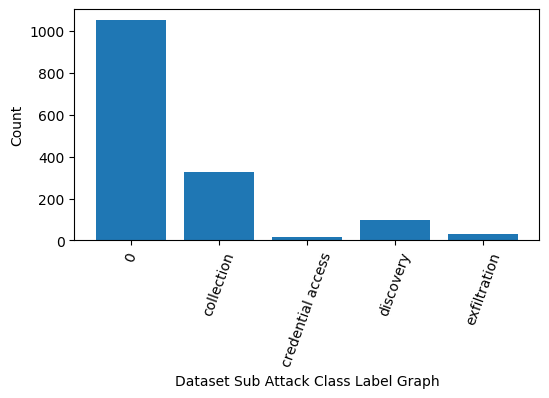

In [5]:
#visualizing Sub Attack class labels count found in dataset
names, count = np.unique(dataset['subLabel'], return_counts = True)
height = count
bars = names
y_pos = np.arange(len(bars))
plt.figure(figsize = (6, 3)) 
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Sub Attack Class Label Graph")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.show()

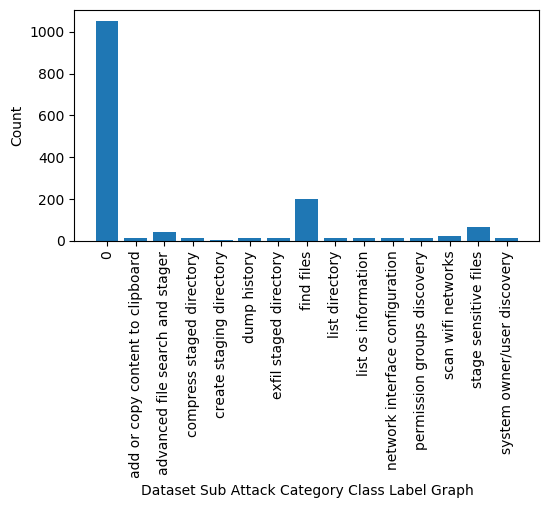

In [6]:
#visualizing sub attack category class labels count found in dataset
sub_cat_attack, count = np.unique(dataset['subLabelCat'], return_counts = True)
height = count
bars = sub_cat_attack
y_pos = np.arange(len(bars))
plt.figure(figsize = (6, 3)) 
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Sub Attack Category Class Label Graph")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

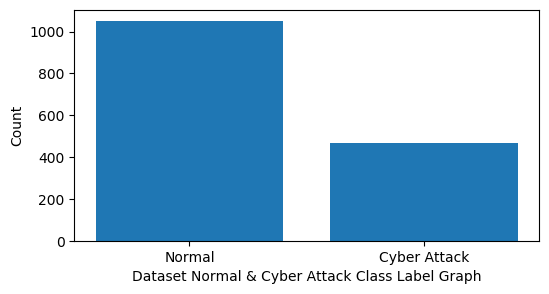

In [7]:
#visualizing normal & cyber attack class labels count found in dataset
labels, count = np.unique(dataset['label'], return_counts = True)
labels = ['Normal', 'Cyber Attack']
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.figure(figsize = (6, 3)) 
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Normal & Cyber Attack Class Label Graph")
plt.ylabel("Count")
plt.show()

In [8]:
#identifying different protocols used to make attacks
data = dataset.loc[dataset['label'] == 1]
data = data.groupby(["Protocol_name"])['label' ].size().sort_values(ascending=False).reset_index(name='Attack Count')
data

,Protocol_name,Attack Count
0,TCP,466


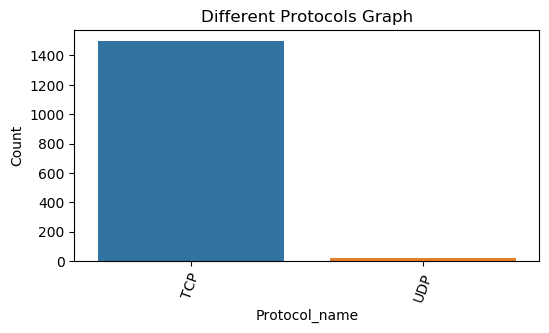

In [9]:
#identifying protocols used in cyber communication
data = dataset.groupby(["Protocol_name"])['label'].size().sort_values(ascending=False).reset_index(name='Count')
g = sns.barplot(x = 'Protocol_name', y = 'Count', data = data)
g.set_xticklabels(g.get_xticklabels(), rotation=70)
g.get_figure().set_size_inches(6, 3)
plt.title("Different Protocols Graph")
plt.show()

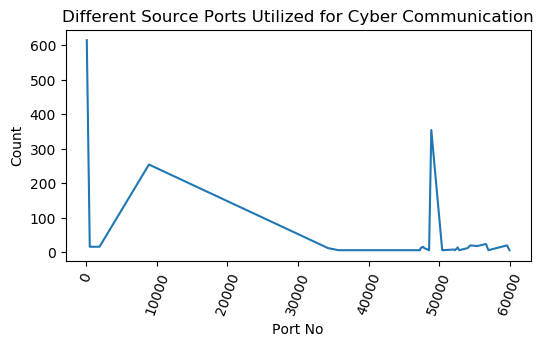

In [10]:
#identifying different 'Source Port No' utilized for cyber communication
data = dataset.groupby(["Source Port"]).size().reset_index(name='Count')
plt.figure(figsize=(6, 3))
plt.plot(data["Source Port"].ravel(), data["Count"].ravel())
plt.xlabel("Port No")
plt.ylabel("Count")
plt.title("Different Source Ports Utilized for Cyber Communication")
plt.xticks(rotation=70)
plt.show()

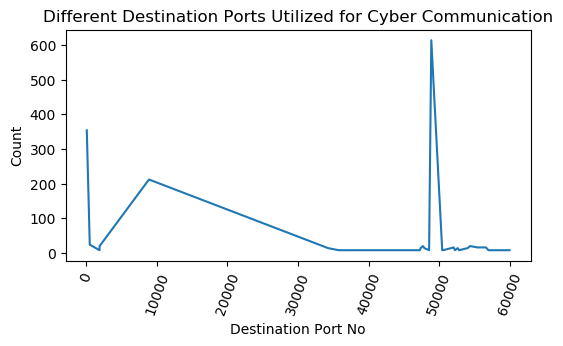

In [11]:
#identifying different 'Destination Port No' utilized for cyber communication
data = dataset.groupby(["Destination Port"]).size().reset_index(name='Count')
plt.figure(figsize=(6, 3))
plt.plot(data["Destination Port"].ravel(), data["Count"].ravel())
plt.xlabel("Destination Port No")
plt.ylabel("Count")
plt.title("Different Destination Ports Utilized for Cyber Communication")
plt.xticks(rotation=70)
plt.show()

In [12]:
#applying dataset label encoding to convert non-numeric data to numeric data
Y = dataset['label'].ravel()
dataset.drop(['label','subLabel', 'subLabelCat'], axis = 1,inplace=True)#drop ir-relevant columns
label_encoder = []
columns = dataset.columns
types = dataset.dtypes.values
for i in range(len(types)):
    name = types[i]
    if name == 'object': #finding column with object type
        le = LabelEncoder()
        dataset[columns[i]] = pd.Series(le.fit_transform(dataset[columns[i]].astype(str)))#encode all str columns to numeric
        label_encoder.append([columns[i], le])
#handling and removing missing values        
dataset.fillna(0, inplace = True)
print("Cleaned Dataset Values")
dataset

Cleaned Dataset Values


,ts,flow_duration,Header_Length,Source IP,Destination IP,Source Port,Destination Port,Protocol Type,Protocol_name,Duration,...,Radius,Covariance,Variance,Weight,DS status,Fragments,Sequence number,Protocol Version,flow_idle_time,flow_active_time
0,1.701582e+09,30.390806,7160,0,2,41596,8888,6,0,64,...,10.337173,53.428571,1.0,196,0,0,0,0,30.284960,30.390806
1,1.701582e+09,30.392918,7226,0,2,41596,8888,6,0,64,...,10.377754,53.848889,1.0,225,0,0,0,0,0.002112,30.392918
2,1.701582e+09,30.393575,7292,2,0,8888,41596,6,0,64,...,10.368221,53.750000,1.0,256,0,0,0,0,0.000657,30.393575
3,1.701582e+09,30.395687,7358,2,0,8888,41596,6,0,64,...,10.324828,53.301038,1.0,289,0,0,0,0,0.002112,30.395687
4,1.701582e+09,61.110169,7424,0,2,41596,8888,6,0,64,...,10.621503,56.408163,1.0,196,0,0,0,0,30.714482,61.110169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,1.701728e+09,1.830635,925682,4,6,48884,80,6,0,64,...,885.710732,392241.750000,1.0,64,0,0,0,0,0.000514,1.830635
1514,1.701728e+09,1.832257,925736,4,6,48884,80,6,0,64,...,964.179790,464821.333333,1.0,81,0,0,0,0,0.001622,1.832257
1515,1.701728e+09,1.834732,927250,5,4,80,48884,6,0,127,...,938.595376,440480.640000,1.0,100,0,0,0,0,0.002475,1.834732
1516,1.701728e+09,1.836713,928752,5,4,80,48884,6,0,127,...,912.175712,416032.264463,1.0,121,0,0,0,0,0.001981,1.836713


In [13]:
#dataset processing shuch as shuflling and normalizing
X = dataset.values
scaler = MinMaxScaler((0, 1))
X = scaler.fit_transform(X)#normalizing or scaling features
indices = np.arange(X.shape[0])
np.random.shuffle(indices)#shuffling dataset
X = X[indices]
Y = Y[indices]
print("Normalized Features = "+str(X))

Normalized Features = [[9.99999443e-01 4.26772434e-03 9.19227428e-01 ... 0.00000000e+00
  1.15935924e-12 4.26772434e-03]
 [5.61855520e-01 8.40517947e-02 7.29096789e-03 ... 0.00000000e+00
  1.76458777e-08 8.40517947e-02]
 [9.99997612e-01 3.07809357e-03 6.63050209e-01 ... 0.00000000e+00
  1.15935924e-12 3.07809357e-03]
 ...
 [9.99995265e-01 1.55310669e-03 3.33890208e-01 ... 0.00000000e+00
  2.45602025e-13 1.55310669e-03]
 [9.99993757e-01 1.37064716e-05 3.39714812e-04 ... 0.00000000e+00
  1.80874053e-13 1.37064716e-05]
 [9.99999410e-01 4.24611753e-03 9.14421969e-01 ... 0.00000000e+00
  1.68530905e-12 4.24611753e-03]]


In [14]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6)
data = np.load("model/data.npy", allow_pickle=True)
X_train, X_test, y_train, y_test = data
print("Dataset Train & Test Split Details")
print("70% Text data used to train algorithms : "+str(X_train.shape[0]))
print("30% Text data used to train algorithms : "+str(X_test.shape[0]))

Dataset Train & Test Split Details
70% Text data used to train algorithms : 1062
30% Text data used to train algorithms : 456


In [15]:
#define global variables to save accuracy and other metrics
accuracy = []
precision = []
recall = []
fscore = []

In [16]:
#function to calculate all metrics
def calculateMetrics(algorithm, testY, predict):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FSCORE    : "+str(f))
    conf_matrix = confusion_matrix(testY, predict)
    fig, axs = plt.subplots(1,2,figsize=(10, 3))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g", ax=axs[0]);
    ax.set_ylim([0,len(labels)])
    axs[0].set_title(algorithm+" Confusion matrix") 

    random_probs = [0 for i in range(len(testY))]
    p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='orange',label="True classes")
    ns_fpr, ns_tpr, _ = roc_curve(testY, predict, pos_label=1)
    axs[1].plot(ns_fpr, ns_tpr, linestyle='--', label='Predicted Classes')
    axs[1].set_title(algorithm+" ROC AUC Curve")
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive rate')
    plt.show()

Random Forest Accuracy  : 96.9298245614035
Random Forest Precision : 96.81404857123707
Random Forest Recall    : 96.12971402153094
Random Forest FSCORE    : 96.46080496729127


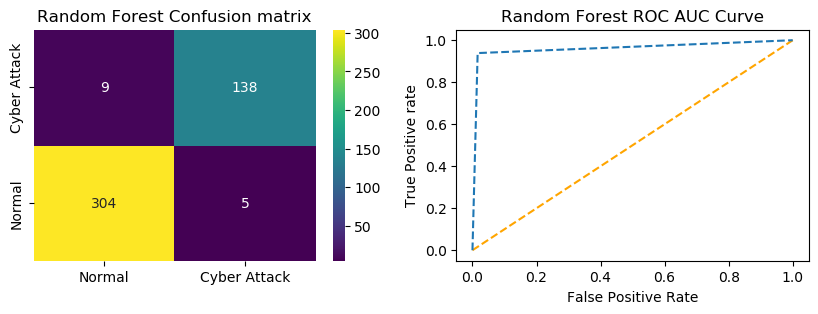

In [17]:
#train Random Forest algorithms on 80% training features and then apply trained model on 20% test
#features to calculate prediction accuracy
rf_cls = RandomForestClassifier(min_weight_fraction_leaf=0.41)
rf_cls.fit(X_train, y_train)
#call this function to predict on test data
predict = rf_cls.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("Random Forest", predict, y_test)

SVM Accuracy  : 94.07894736842105
SVM Precision : 95.68690095846645
SVM Recall    : 92.05882352941177
SVM FSCORE    : 93.4331446980324


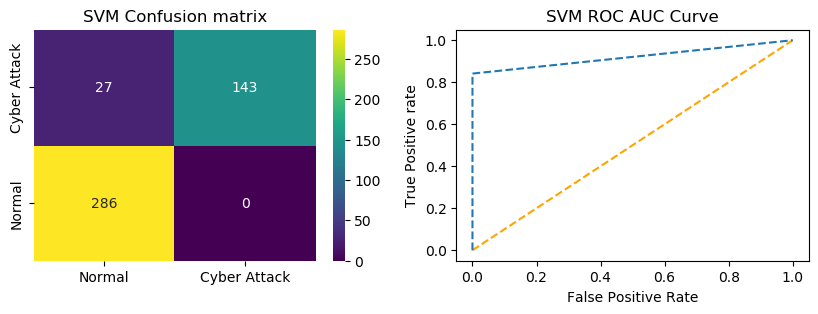

In [18]:
#train SVM algorithms on 80% training features and then apply trained model on 20% test
#features to calculate prediction accuracy
svm_cls = svm.SVC(kernel='linear', tol=2)
svm_cls.fit(X_train, y_train)
#call this function to predict on test data
predict = svm_cls.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("SVM", predict, y_test)

Logistic Regression Accuracy  : 99.78070175438597
Logistic Regression Precision : 99.84025559105432
Logistic Regression Recall    : 99.65277777777779
Logistic Regression FSCORE    : 99.74578397212544


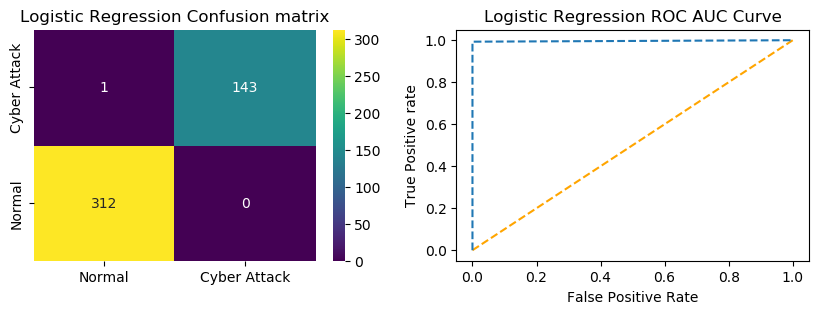

In [19]:
#train LogisticRegression algorithms on 80% training features and then apply trained model on 20% test
#features to calculate prediction accuracy
lr_cls = LogisticRegression(tol=6)
lr_cls.fit(X_train, y_train)
#call this function to predict on test data
predict = lr_cls.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("Logistic Regression", predict, y_test)



Train on 1062 samples, validate on 456 samples
Epoch 1/10
1062/1062 [==============================] - 1s 1ms/step - loss: 0.1217 - accuracy: 0.9360 - val_loss: 0.0070 - val_accuracy: 0.9978

Epoch 00001: val_loss improved from inf to 0.00704, saving model to model/cnn_weights.hdf5
Epoch 2/10
1062/1062 [==============================] - 1s 1ms/step - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.0017 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.00704 to 0.00168, saving model to model/cnn_weights.hdf5
Epoch 3/10
1062/1062 [==============================] - 2s 2ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.00168 to 0.00109, saving model to model/cnn_weights.hdf5
Epoch 4/10
1062/1062 [==============================] - 2s 2ms/step - loss: 8.6155e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 0.00109
Epoch 5/10
1062/1062 [=============

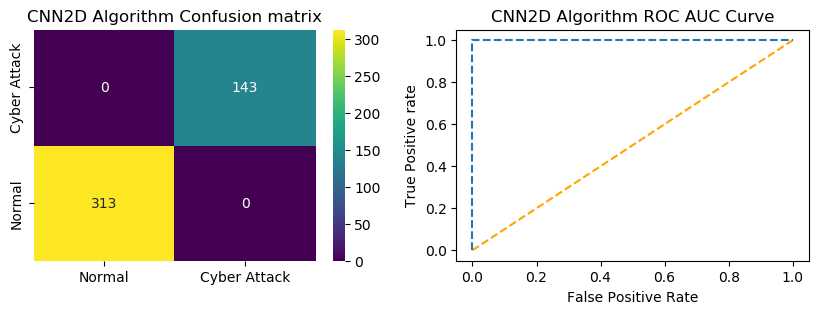

In [20]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
#defining CNN2D algorithm with dropout layer to remove irrelevant features while training so CNN2D can trained
#on best optimized features to enhnace accuracy
#CNN2D is a multidimensional neural network which trained in multidimension features to analyse all weights from vector
#and then trained model using best features
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))
#training CNN2D algorithm on training features
cnn_model = Sequential()
cnn_model.add(Convolution2D(32, (1, 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Dropout(0.3))
cnn_model.add(Convolution2D(32, (1, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 256, activation = 'relu'))
cnn_model.add(Dense(units = y_train1.shape[1], activation = 'softmax'))
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/cnn_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose = 1, save_best_only = True)
    hist = cnn_model.fit(X_train1, y_train1, batch_size = 16, epochs = 10, validation_data=(X_test1, y_test1), callbacks=[model_check_point], verbose=1)
    f = open('model/cnn_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    cnn_model.load_weights("model/cnn_weights.hdf5")
#call this function to predict on test data     
predict = cnn_model.predict(X_test1)
predict = np.argmax(predict, axis=1)
y_test2 = np.argmax(y_test1, axis=1)
#call this function to calculate accuracy and other metrics
calculateMetrics("CNN2D Algorithm", predict, y_test2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
GAN Algorithm Accuracy  : 99.0
GAN Algorithm Precision : 50.0
GAN Algorithm Recall    : 49.5
GAN Algorithm FSCORE    : 49.74874371859296


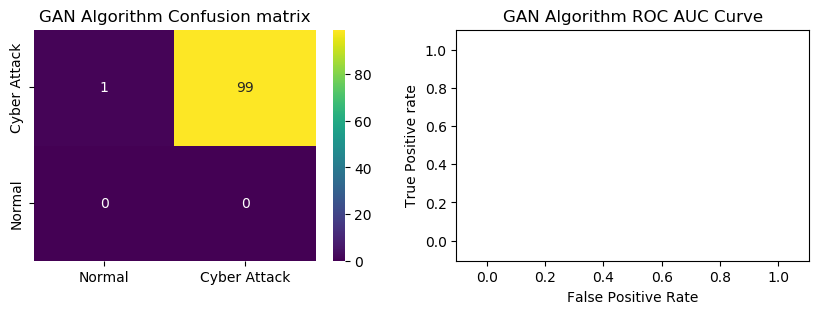

In [21]:
#defing GAN generator and discriminator functions
def build_generator(latent_dim, feature_size):
    model = Sequential()
    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(feature_size, activation='tanh')) # Output layer
    return model

def build_discriminator(feature_size):
    model = Sequential()
    model.add(Dense(512, input_dim=feature_size))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid')) # Output layer
    return model

latent_dim = 100 # Dimension of the latent space
feature_size = X.shape[1] # Number of features in your data

generator = build_generator(latent_dim, feature_size)#getting generator object
discriminator = build_discriminator(feature_size)#getting discriminator object

discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

discriminator.trainable = False # Freeze the discriminator during GAN training

gan_input = Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)
#creating GAN model by combining generator and discriminator
gan = Model(gan_input, gan_output)
gan.compile(optimizer=Adam(0.0002, 0.3), loss='binary_crossentropy')
batch_size = 256
true_data = []
predict_data = []

for epoch in range(0, 100):
    # Train the discriminator
    real_data = X[np.random.randint(0, X.shape[0], batch_size)]#getting real data from X training features
    noise = np.random.normal(0, 1, (batch_size, latent_dim))#creating empty random boise data size
    generated_data = generator.predict(noise) #generating synthetic data based on noise data size
    d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))#discriminator training on real data
    #training discriminator on generate data
    d_loss_fake = discriminator.train_on_batch(generated_data, np.zeros((batch_size, 1)))
    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
    #calculate label of real and generated data
    true_label = np.argmax(d_loss_real)
    predict_label = np.argmax(d_loss_fake)
    true_data.append(true_label)
    predict_data.append(predict_label)
#call this function to calculate accuracy and other metrics
calculateMetrics("GAN Algorithm", true_data, predict_data)

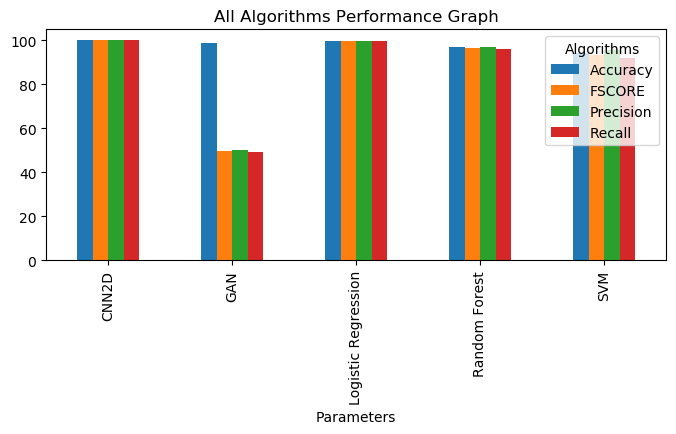

In [24]:
#plot all algorithm performance in tabukar format
df = pd.DataFrame([['Random Forest','Accuracy',accuracy[0]],['Random Forest','Precision',precision[0]],['Random Forest','Recall',recall[0]],['Random Forest','FSCORE',fscore[0]],
                   ['SVM','Accuracy',accuracy[1]],['SVM','Precision',precision[1]],['SVM','Recall',recall[1]],['SVM','FSCORE',fscore[1]],
                   ['Logistic Regression','Accuracy',accuracy[2]],['Logistic Regression','Precision',precision[2]],['Logistic Regression','Recall',recall[2]],['Logistic Regression','FSCORE',fscore[2]],
                   ['CNN2D','Accuracy',accuracy[3]],['CNN2D','Precision',precision[3]],['CNN2D','Recall',recall[3]],['CNN2D','FSCORE',fscore[3]],
                   ['GAN','Accuracy',accuracy[4]],['GAN','Precision',precision[4]],['GAN','Recall',recall[4]],['GAN','FSCORE',fscore[4]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar', figsize=(8, 3))
plt.title("All Algorithms Performance Graph")
plt.show()

In [25]:
#display all algorithm performnace
algorithms = ['Random Forest', 'SVM', 'Logistic Regression', 'Deep Learning CNN2D', 'GAN']
data = []
for i in range(len(accuracy)):
    data.append([algorithms[i], accuracy[i], precision[i], recall[i], fscore[i]])
data = pd.DataFrame(data, columns=['Algorithm Name', 'Accuracy', 'Precision', 'Recall', 'FSCORE'])
data  

,Algorithm Name,Accuracy,Precision,Recall,FSCORE
0,Random Forest,96.929825,96.814049,96.129714,96.460805
1,SVM,94.078947,95.686901,92.058824,93.433145
2,Logistic Regression,99.780702,99.840256,99.652778,99.745784
3,Deep Learning CNN2D,100.000000,100.000000,100.000000,100.000000
4,GAN,99.000000,50.000000,49.500000,49.748744


In [26]:
#read test values from test dataset file and then predict cellular traffic demand
test_data = pd.read_csv("Dataset/testData.csv")#reading test data values
temp = test_data.values
for i in range(len(label_encoder)):
    le = label_encoder[i]
    test_data[le[0]] = pd.Series(le[1].transform(test_data[le[0]].astype(str)))#encode all str columns to numeric
#handling and removing missing values        
test_data.fillna(0, inplace = True)
test_data = test_data.values
test_data = scaler.transform(test_data)#select features using select k-best
predict = lr_cls.predict(test_data)#perform prediction using logistic regression on test data
for i in range(len(predict)):
    print("Test Data = "+str(temp[i])+" Predicted As ====> "+labels[predict[i]])
    print()

Test Data = [1701727700.2926712 0.8760979175567627 440932 '93.93.128.193'
 '172.16.67.128' 80 48884 6 'TCP' 127 525.0554655840698 525.0554655840698
 0.0 0 0 0 1 1 0 0 0 0 0 0 167 460 1701727700.2926712 1701727699.416573
 782794741932.9689 1701727699.8542802 0.2540047142026374 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 1514 1514 1514 1514.0 0.0 1514 0.0019810199737548 1 808448
 55.027265968790424 0.0 0.0 0.0 1 0 0 0 0 0.0019810199737548
 0.8760979175567627] Predicted As ====> Normal

Test Data = [1701727700.2931788 0.8766059875488281 440986 '172.16.67.128'
 '93.93.128.193' 48884 80 6 'TCP' 64 525.8919132973886 525.8919132973886
 0.0 0 0 0 0 1 0 0 0 0 0 0 167 461 1701727700.2931788 1701727699.416573
 784496469633.2621 1701727699.8552322 0.2545493851506619 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 1568 54 1514 784.0 730.0 54 0.0005080699920654 2 808448
 39.597979746446654 1032.3759005323593 532900.0 1.0 4 0 0 0 0
 0.0005080699920654 0.8766059875488281] Predicted As ====> Normal

Test Data = [1701524591.7172